# HW 08 (Nov 21st) - Avina Chan

**2) Real-world Application of the Following Metrics**  

1. **Accuracy** measures the proportion of true results (both true positives and true negatives) in the population.

$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$

**Real-World Example**: In a spam email classifier, accuracy measures how often the classifier correctly identifies both spam and non-spam emails. If the classifier predicts spam and non-spam emails accurately, the overall accuracy will be high.  

<br>

2. **Sensitivity** measures the proportion of actual positives that are correctly identified.

$$\text{Sensitivity} = \frac{TP}{TP + FN}$$

**Real-World Example**: In cancer diagnostics, sensitivity is important. It indicates how well the test identifies true positives (when there is actual cancer). A test with high sensitivity ensures that most cases of cancer are detected, minimizing the chance of missing a patient with cancer (false negatives).  

<br>

3. **Specificity** measures the proportion of actual negatives that are correctly identified. (AKA True Negative Rate)

$$\text{Specificity} = \frac{ TN}{TN + FP}$$

**Real-World Example**: In security systems like facial recognition, specificity helps measure how well the system correctly identifies non-threats. High specificity minimizes the chances of falsely identifying innocent people as threats (i.e., false positives), which is important to avoid unnecessary alarms and disturbances.  

<br>

4. **Precision** measures the proportion of positive identifications that were actually correct.

$$\text{Precision} = \frac{TP}{TP + FP}$$

**Real-World Example**: In fraud detection for credit card transactions, precision measures how many of the transactions flagged as fraudulent are actually fraudulent. High precision means that when the system flags a transaction as fraudulent, it is more likely to be correct, minimizing the number of false positives (legitimate transactions that are incorrectly marked as fraud). This helps ensure that customers are not inconvenienced by false alarms.


**3) Fixing data**

In [3]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

In [2]:
# Drop the columns 'Weight_oz', 'Width', and 'Height'
ab_reduced_noNaN = ab.drop(columns=['Weight_oz', 'Width', 'Height'])

# Drop rows with NaN entries
ab_reduced_noNaN = ab_reduced_noNaN.dropna()

# Convert 'Pub year' and 'NumPages' to integer type
ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)

# Convert 'Hard_or_Paper' to category type
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Check the cleaned DataFrame
ab_reduced_noNaN.info()


<class 'pandas.core.frame.DataFrame'>
Index: 319 entries, 0 to 324
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Title          319 non-null    object  
 1   Author         319 non-null    object  
 2   List Price     319 non-null    float64 
 3   Amazon Price   319 non-null    float64 
 4   Hard_or_Paper  319 non-null    category
 5   NumPages       319 non-null    int64   
 6   Publisher      319 non-null    object  
 7   Pub year       319 non-null    int64   
 8   ISBN-10        319 non-null    object  
 9   Thick          319 non-null    float64 
dtypes: category(1), float64(3), int64(2), object(4)
memory usage: 25.4+ KB


**4) Classification Tree**

In [4]:
# Set random seed for reproducibility
random_seed = 42

# Create the training set (80%) and testing set (20%)
ab_reduced_noNaN_train = ab_reduced_noNaN.sample(frac=0.8, random_state=random_seed)
ab_reduced_noNaN_test = ab_reduced_noNaN.drop(ab_reduced_noNaN_train.index)

# Report the number of observations in each dataset
train_size = ab_reduced_noNaN_train.shape[0]
test_size = ab_reduced_noNaN_test.shape[0]

print(f"Training set size: {train_size} observations")
print(f"Test set size: {test_size} observations")

Training set size: 255 observations
Test set size: 64 observations


`y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']` <br>
This step is converting the categorical values in the `Hard_or_Paper` column into binary (AKA dummy) variables using `pd.get_dummies()`. It creates a df with binry columns for each unique category in that column. Then the `['H']` selects only the column corresponding to the `'H'` category. the resulting Y is a binary vector where 1 means book = hardcover and 0 means the book is not a hardcover.
<br>
<br>
`X = ab_reduced_noNaN[['List Price']]`
    This step helps selects the input variables that would be used to preduct the target variable (y). The `[['List Price']}` selects the column `List Price` from the df and is treated as the variable x for the mdoel.

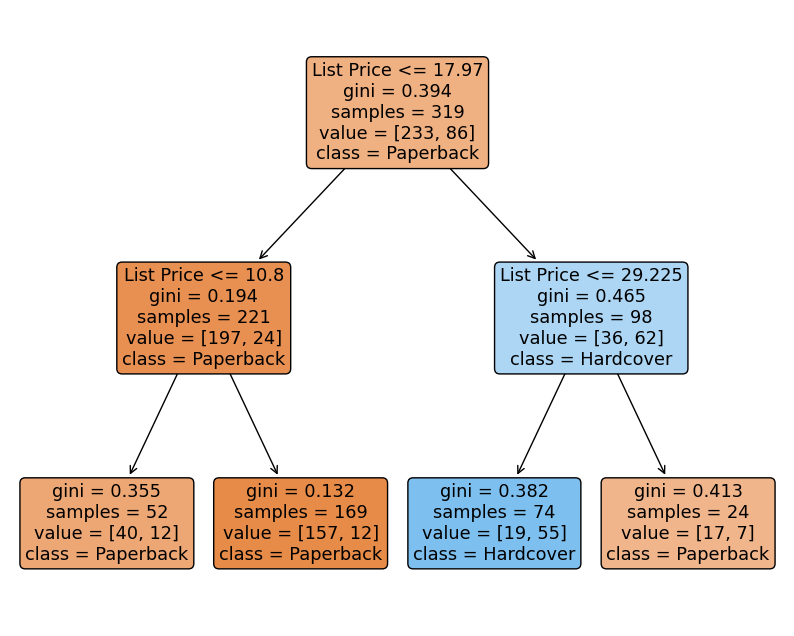

In [6]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
X = ab_reduced_noNaN[['List Price']]

# Train the classification tree model
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Fit the model using List Price to predict Hard_or_Paper ('H' for hardcover)
clf.fit(X, y)

# Plot the decision tree to visualize the predictions based on List Price
plt.figure(figsize=(10, 8))
tree.plot_tree(clf, feature_names=['List Price'], class_names=['Paperback', 'Hardcover'], filled=True, rounded=True)
plt.show()

This plot shows how the `List Price` splits to predict whether a book is hardcover or paperback based on its price. Then it splits off to show the class predictions (paperback/hardcover), along with the number of samples in that category and the predicted class probability. 

**5) Classification Decision Tree 2**

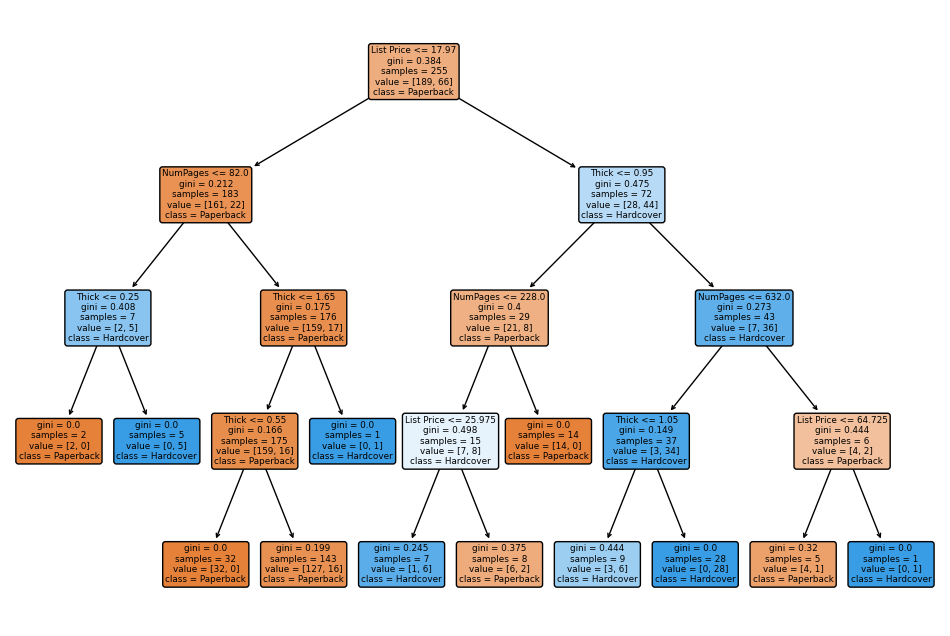

In [7]:
# Split the dataset into training and testing sets (80/20 split)
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']  # Target: Hardcover or not
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the classification decision tree with max_depth=4
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X_train, y_train)

# Plot the decision tree using sklearn's plot_tree function
plt.figure(figsize=(12, 8))
tree.plot_tree(clf2, feature_names=['NumPages', 'Thick', 'List Price'], 
               class_names=['Paperback', 'Hardcover'], filled=True, rounded=True)
plt.show()


**6) Confusion matrices for clf and clf2**

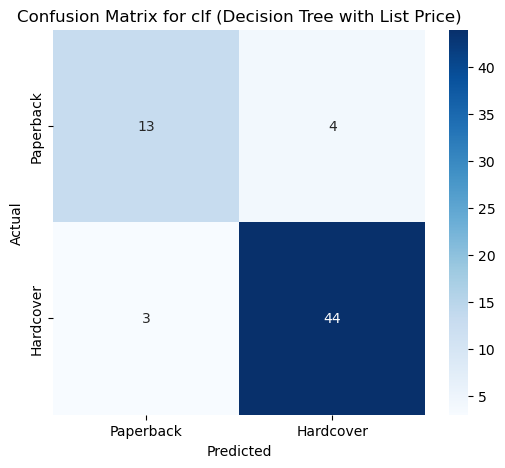

Accuracy for clf (List Price model): 0.8906
Sensitivity for clf (List Price model): 0.7647
Specificity for clf (List Price model): 0.9362


In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

# Predict the labels using the clf model on the test set
y_pred_clf = clf.predict(ab_reduced_noNaN_test[['List Price']])

# Convert boolean predictions (False/True) to 'P' and 'H' labels
y_pred_clf_labels = ['P' if pred == False else 'H' for pred in y_pred_clf]

# Getting the confusion matrix for clf
cm_clf = confusion_matrix(ab_reduced_noNaN_test['Hard_or_Paper'], y_pred_clf_labels)

# Display the confusion matrix using a heatmap for better visualization
plt.figure(figsize=(6, 5))
sns.heatmap(cm_clf, annot=True, fmt='d', cmap='Blues', xticklabels=['Paperback', 'Hardcover'], yticklabels=['Paperback', 'Hardcover'])
plt.title("Confusion Matrix for clf (Decision Tree with List Price)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Calculate accuracy
accuracy_clf = accuracy_score(ab_reduced_noNaN_test['Hard_or_Paper'], y_pred_clf_labels)
print(f"Accuracy for clf (List Price model): {accuracy_clf:.4f}")

# Calculate sensitivity (Recall for 'Hardcover' class)
sensitivity_clf = recall_score(ab_reduced_noNaN_test['Hard_or_Paper'], y_pred_clf_labels, pos_label='H')
print(f"Sensitivity for clf (List Price model): {sensitivity_clf:.4f}")

# Calculate specificity (Recall for 'Paperback' class)
specificity_clf = recall_score(ab_reduced_noNaN_test['Hard_or_Paper'], y_pred_clf_labels, pos_label='P')
print(f"Specificity for clf (List Price model): {specificity_clf:.4f}")

Accuracy: the model correctly classifies 89.06% of all books based on their list price <br>
Sensitivity: The model correctly identifies 76.47% of all hardcover books <br>
Specificity: the model correctly identifies 93.62% of all paperbacl books 
**Relatively balanced classification, slighlty better at identifying paperbacks than hardcover**

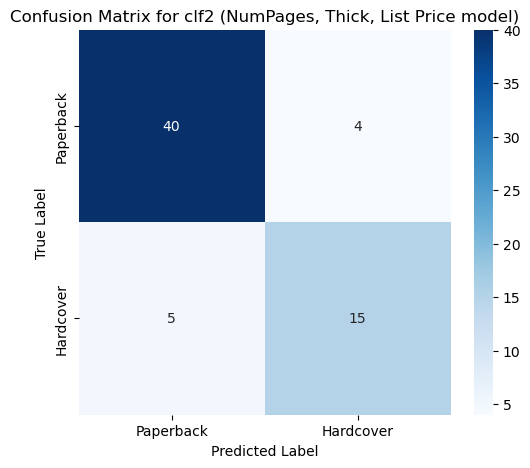

Confusion Matrix for clf2 (NumPages, Thick, List Price model):
[[40  4]
 [ 5 15]]
Accuracy for clf2 (NumPages, Thick, List Price model): 0.8594
Sensitivity for clf2 (NumPages, Thick, List Price model): 0.7500
Specificity for clf2 (NumPages, Thick, List Price model): 0.7500


In [19]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the test set
y_pred_clf2 = clf2.predict(X_test)

# Compute the confusion matrix for clf2
cm_clf2 = confusion_matrix(y_test, y_pred_clf2)

# Plotting the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_clf2, annot=True, fmt='d', cmap='Blues', xticklabels=['Paperback', 'Hardcover'], yticklabels=['Paperback', 'Hardcover'])

# Labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for clf2 (NumPages, Thick, List Price model)')
plt.show()

# Optionally, you can print the confusion matrix and additional metrics
print("Confusion Matrix for clf2 (NumPages, Thick, List Price model):")
print(cm_clf2)

# Calculate additional metrics: accuracy, sensitivity, specificity
accuracy_clf2 = accuracy_score(y_test, y_pred_clf2)
sensitivity_clf2 = recall_score(y_test, y_pred_clf2)
specificity_clf2 = cm_clf2[1, 1] / (cm_clf2[1, 1] + cm_clf2[1, 0])

print(f"Accuracy for clf2 (NumPages, Thick, List Price model): {accuracy_clf2:.4f}")
print(f"Sensitivity for clf2 (NumPages, Thick, List Price model): {sensitivity_clf2:.4f}")
print(f"Specificity for clf2 (NumPages, Thick, List Price model): {specificity_clf2:.4f}")

Accuracy: the model correctly predicts 85.94%  of the observations <br>
Sensitivity:the model correctly identifies only 75% of the actual hardcover books <br>
Specificity: 75% means that the model correctly identifies 75% of the paperback books

**Model performs equally well at identifying both hardcover and paperback**

**7) Comparisons of confusion matrices**

In [ ]:
ConfusionMatrixDisplay(
    confusion_matrix(ab_reduced_noNaN_train.life_exp_good, 
                     clf.predict(ab_reduced_noNaN_train[['List Price']]), 
                     labels=[0, 1]), display_labels=["Paper","Hard"]).plot()
ConfusionMatrixDisplay(
    confusion_matrix(ab_reduced_noNaN_train.life_exp_good, 
                     clf.predict(
                         ab_reduced_noNaN_train[['NumPages','Thick','List Price']]), 
                     labels=[0, 1]), display_labels=["Paper","Hard"]).plot()

The first matrix is only trained by List Price feature to predict whether it is hardcover or paperback, whereas the second matrix involves Numpages, Thick and List Price. The second matrix, will provide more information for the model to make better preductions than the first matrix. 
<br>
<br>
The code above are on the training set show higher accuracy but could be misleading if the models are overfitting to the training data, whereas clf and clf2 are based on the test set and is more useful for evaluating model performance because they measure how well the model generalizes to unseen data.

**ChatGPT**: https://chatgpt.com/share/673fff1e-13e8-8001-8143-ef605efb7aec
Here's a summary of our chat:

1. **Confusion Matrices**:
   - The confusion matrices discussed in the code snippets assess the performance of two decision tree models (`clf` and `clf2`) using different feature sets. The models are evaluated on a test set (`ab_reduced_noNaN_test`), and performance metrics such as accuracy, sensitivity, and specificity are calculated.

2. **Training vs. Testing Evaluation**:
   - There was a comparison between confusion matrices generated on the **training set** using `ConfusionMatrixDisplay` and those generated on the **test set** in your later code. The confusion matrices for the training set might show better performance (due to overfitting) and use a different target variable (`life_exp_good` vs. `Hard_or_Paper`).

3. **Target Variables**:
   - The confusion matrices from the `ConfusionMatrixDisplay` code use a target variable (`life_exp_good`) that is different from the target in the second set of confusion matrices (`Hard_or_Paper`), making them not directly comparable.

4. **Model Performance**:
   - The confusion matrices on the **test set** (for both `clf` and `clf2`) are considered better for evaluating model performance since they reflect how well the models generalize to unseen data, while training set evaluations might show artificially high performance due to overfitting.

5. **Importance of Metrics**:
   - The confusion matrices you shared later also include performance metrics like accuracy, sensitivity, and specificity, providing a more complete understanding of the model's performance. The `ConfusionMatrixDisplay` matrices lack such detailed insights.

In conclusion, the confusion matrices from the test set (with accuracy, sensitivity, and specificity metrics) offer a better understanding of how the models perform in a real-world scenario compared to the ones generated on the training set.